<a href="https://www.kaggle.com/code/lugattuso/sentiment-analysis-textblob-vs-vader?scriptVersionId=146978851" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of contents
* [Sentiment analysis using Womens Clothing E-commerce reviews](#section1)
    * [1. Importing libraries and dataset](#section2)
    * [2. Cleaning up the dataset ](#section3)
    * [3. Sentiment analysis](#section4)
    * [4. Visualization](#section5)
    * [5. WordCloud for Description column](#section6)
    * [Conclusion](#section7)

#Note: To make the TOC's links work,everything should be written with no spaces inbetween letters and ']('

## Sentiment analysis using Womens Clothing E-commerce reviews  <a class="anchor"  id="section1"></a>

When a product owner or service provider wants to know the opinion of users, sentiment analysis provides a strong indication of user satisfaction with the product or service. Sentiment analysis describes the process of measuring the sentiment of phrases or text in general. It is a process of analyzing data and classifying it according to research needs. By analyzing these sentiments, we can find out what people like, what they want and what their main concerns are. TextBlob is an open-source Python library for textual data processing. It provides a simple API to access its methods and perform basic NLP tasks. TextBlob actively uses Natural Language ToolKit (NLTK) to perform its tasks. NLTK is a library that facilitates access to a large number of lexical resources and allows users to work with categorization, classification and many other tasks. 

This notebook will analyze  reviews written by women's customers on clothing from an e-commerce. The dataset was published on Kaggle, more information could be get from here [https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews]. This dataset includes a Clothing ID, Age, review's Title, Review Text, Rating, Division Name, Department Name, and Class Name.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
Division Name: *Categorical* name of the product high level division.
Department Name: *Categorical* name of the product department name.
Class Name: *Categorical* name of the product class name.Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed

This analysis will first outline/ focus on the dataset main characteristics to undeerstand it's natur and will then NLP applyed to the text. Prerequisites cleaning, installing and importing libraries,
Next, it closely examines ... in relation to ... Finally, it focuses on ... and how this affects ...

-- [first] outline/examine/address/argue/demonstrate/focus on ... and will [then] --ascertain/establish/clarify/show/judge/prove ... 

There are 2 types of analysis over Sentiment Analysis, a Rule-base one defined by rules where keywords are map and have a numerical score, another one is a more data-driven one were a Machine learning algorithm is being train and gives as a output a numerical value to measure the sentiment. 

# How TextBlob works?
TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word. For English, adverbs are used as modifiers (‘very good’).

It is also useful to perform different operations on textual data such as noun phrase extraction, sentiment analysis, classification, translation, etc.

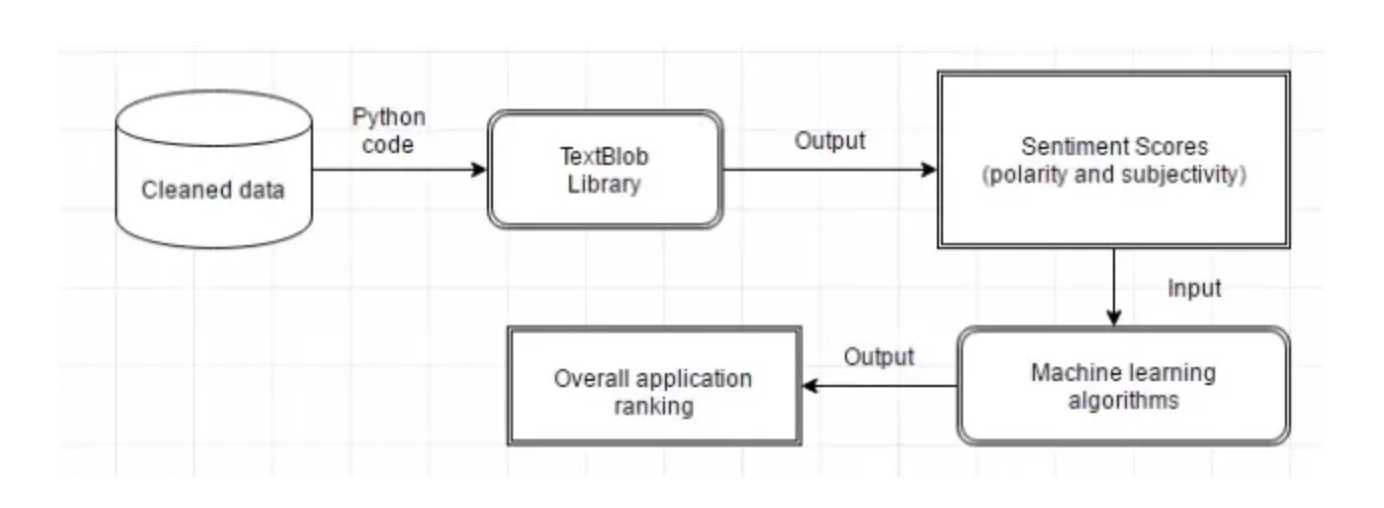

# 1. Importing libraries and dataset <a class="anchor"  id="section2"></a>

In [1]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Sentiment Analysis
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Checking the current directory of the project before providing the file path
import os
os.listdir('/kaggle/input/womens-ecommerce-clothing-reviews')

['Womens Clothing E-Commerce Reviews.csv']

In [4]:
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
print(df.shape)

(23486, 11)


# 2. Cleaning up the dataset <a class="anchor"  id="section3"></a>

# To start with the cleaning process, a quick look once over of the dataset is useful to identify any glaring outliers or human mistakes.

In [5]:
df.sample(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
20262,20262,985,63,Just what i was looking for.,I had been looking for a green jacket with a h...,5,1,0,General Petite,Jackets,Jackets
21723,21723,895,33,So very pretty,"This is such a classy, elegant and interest pi...",5,1,1,General Petite,Tops,Fine gauge
6885,6885,1094,50,Surprisingly very pleased!,I bought this dress online last week (in large...,5,1,1,General Petite,Dresses,Dresses
23142,23142,749,34,Beautiful,I've never worn a romper before but decided to...,5,1,0,General,Bottoms,Shorts
1926,1926,1082,59,Very unflattering dress,"This dress looks lovely on the model, but it l...",1,0,6,General Petite,Dresses,Dresses


## The data set contains 23,486 rows of data. At first glance, the dataset has one column that appears to contain redundant index information. The following code is to drop that column.

In [6]:
df = df.drop(columns = "Unnamed: 0")

## In addition, the column names could be improved and converted to snake case without spaces separated by an underscore, and all letters in lowercase.

In [7]:
df.columns = (df.columns
                .str.replace(' ', '_')
                .str.lower()
             )
print(df.columns)

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')


## Also, another good practice is to give a check on how many Null values there are in the dataset. 

Note: I personally like doing this before converting the objects into strings to avoid converting NA values into actual strings.

In [8]:
df.isna().sum() 

clothing_id                   0
age                           0
title                      3810
review_text                 845
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                14
department_name              14
class_name                   14
dtype: int64

### Most of the null values are concentrated in the title column, since we will not be working with this column during the analysis this does not affect. 

In [9]:
rows_with_na = df[df['review_text'].isna()]
print(rows_with_na)

       clothing_id  age title review_text  rating  recommended_ind  \
92             861   23   NaN         NaN       5                1   
93            1081   31   NaN         NaN       5                1   
98            1133   50   NaN         NaN       5                1   
135            861   35   NaN         NaN       4                1   
142           1126   35   NaN         NaN       5                1   
...            ...  ...   ...         ...     ...              ...   
23258          862   35   NaN         NaN       4                1   
23301          862   52   NaN         NaN       5                1   
23303          823   46   NaN         NaN       5                1   
23470         1104   39   NaN         NaN       5                1   
23480          862   35   NaN         NaN       5                1   

       positive_feedback_count   division_name department_name class_name  
92                           0  General Petite            Tops      Knits  
93     

### The following code displays the rows of reviews that are empty and, coincidentally, coincide with having an empty title as well. Out of the total 23,486 actual rows, 845 have null values on review and 3810 null titles. The way of dealing with null values will be different depending on the data we are handling and the purpose of the analysis. In this case, I'd like to know what percentage of the dataset these null values on reviews represents. 

In [10]:
total_rows = len(df)
missing_rows = df['review_text'].isna().sum()

percentage_missing = (missing_rows / total_rows) * 100
print(f'Percentage of Missing Values: {percentage_missing:.2f}%')

Percentage of Missing Values: 3.60%


### *About the previous code*

The line `f"Percentage of Missing Values: {percentage_missing:.2f}%"` is using a formatted string literal, often referred to as an f-string, to create a string with placeholders for variables. This allows you to insert variable values directly into the string while controlling their formatting.

Let's break down the components of this f-string:

1. `"Percentage of Missing Values: "`: This is the static part of the string that doesn't change. It provides context for what you're calculating.

2. `{percentage_missing:.2f}`: This is a placeholder for the `percentage_missing` variable. The `.2f` inside the curly braces specifies that the variable should be formatted as a floating-point number with 2 decimal places.

3. `"%"`: This is the literal percentage sign that is added after the calculated value.

When you use an f-string like this, Python evaluates the expressions inside the curly braces and formats them according to the provided formatting instructions. In this case, `percentage_missing` is formatted as a floating-point number with 2 decimal places, and the final result is combined with the static text to create the formatted string.

For example, if `percentage_missing` is calculated to be 25.00, the resulting formatted string will be: "Percentage of Missing Values: 25.00%". This makes it easy to include calculated values in strings without needing to use string concatenation or manual formatting.

### Next step would be to drop rows with missing values from Reviews.


In [11]:
df = df.dropna(subset=['review_text'])

*Note - Code improvement:* If the NA rows comprise less than 10% of the dataset, this data cleaning process can be further improved with a function to automatically drop the NA rows.

## Next checking on duplicates, the following code is comparting all columns of the dataframe to check which rows have the same data. The outcome marks duplicates as True except for the first occurence. 

In [12]:
df[df.duplicated()]

#Why double []? Because in order to get it filtered by the boolean indexing. 

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
21888,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans


## Understanding and correctly setting data types is important for effective data cleaning and analysis. The first thing to be done is identifying data types in order to find mismatches. 

In [13]:
df.dtypes

clothing_id                 int64
age                         int64
title                      object
review_text                object
rating                      int64
recommended_ind             int64
positive_feedback_count     int64
division_name              object
department_name            object
class_name                 object
dtype: object

**Object** data types can be memory-intensive, especially if the column contains long strings or if there are many unique string values. In contrast, using more specific data types like *int* or *category* can save memory and improve performance.

## Also, in order to detect Categories, getting unique values from columns stored as Object could be a useful.

In [14]:
unique_division_name = df['division_name'].unique()
unique_department_name = df['department_name'].unique()
unique_class_name = df['class_name'].unique()

print("Unique values in the unique_division_name:", unique_division_name)

print("Unique values in the unique_department_name:", unique_department_name)

print("Unique values in the unique_class_name:", unique_class_name)

Unique values in the unique_division_name: ['Initmates' 'General' 'General Petite' nan]
Unique values in the unique_department_name: ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
Unique values in the unique_class_name: ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' nan 'Casual bottoms' 'Chemises']


## In this case, we could see there are some mispelled words like Intimates and replacing the wrong ones.

In [15]:
df['division_name'] = df['division_name'].str.replace('Initmates', 'Intimates')
df['department_name'] = df['department_name'].str.replace('Intimate', 'Intimates')

##  Columns converted into Category type.

--preguntas, por qué esas preguntas se convierten en category y no otras????? Qué criterio se utiliza?

In [16]:
df['division_name'] = df['division_name'].astype('category')
df['department_name'] = df['department_name'].astype('category')
df['class_name'] = df['class_name'].astype('category')

### Boolean type

In [17]:
df['recommended_ind'].unique()

array([1, 0])

In [18]:
df['recommended_ind'] = df['recommended_ind'].astype('bool')

## Checking on how our dataset types are now. 

In [19]:
df.dtypes

clothing_id                   int64
age                           int64
title                        object
review_text                  object
rating                        int64
recommended_ind                bool
positive_feedback_count       int64
division_name              category
department_name            category
class_name                 category
dtype: object

# 3. Data distribution

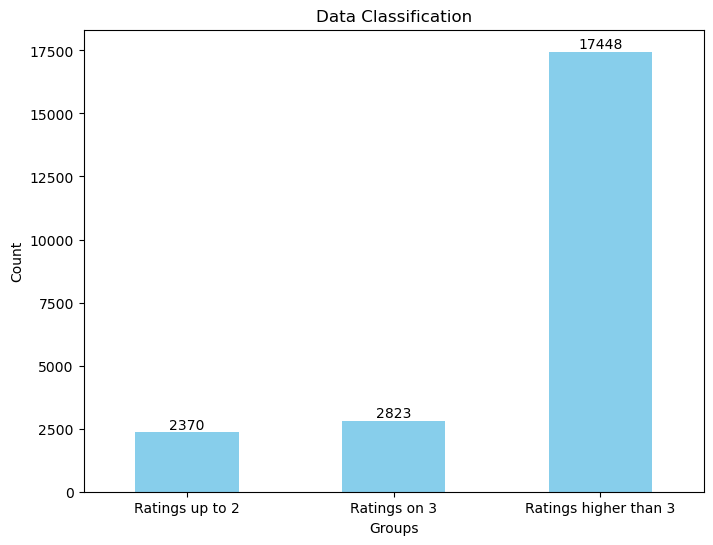

In [20]:
#Agrupación por grupos para visualizar claramente cómo está distribuido el dataset
# Create a new column to classify the data
def classify_data(row):
    if (row['rating'] >= 1 and row['rating'] <= 2) : #and (row['tb_pol'] < 0.3) and (row['neg'] > 0.6)
        return 'Ratings up to 2'
    elif (row['rating'] == 3)  : #and (0.3 <= row['tb_pol'] <= 0.6) and (row['neu'] > 0.6)
        return 'Ratings on 3'
    elif (row['rating'] >= 4 and row['rating'] <= 5)  : #and (row['tb_pol'] > 0.6) and (row['pos'] > 0.6)
        return 'Ratings higher than 3'

# Apply the classification function to each row
df['classification'] = df.apply(classify_data, axis=1)

# Count the number of data points in each group
group_counts = df['classification'].value_counts()

# Define the order of the groups
group_order = ['Ratings up to 2', 'Ratings on 3', 'Ratings higher than 3']

# Sort the data based on the custom order
group_counts = group_counts.reindex(group_order)

# Plot the data
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.title('Data Classification')
plt.xticks(rotation=0)

# Annotate each bar with its count
for i, count in enumerate(group_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

### Most of review's ratings concentrate as positives between 4 and 5 declared from the customer

<Axes: xlabel='department_name', ylabel='rating'>

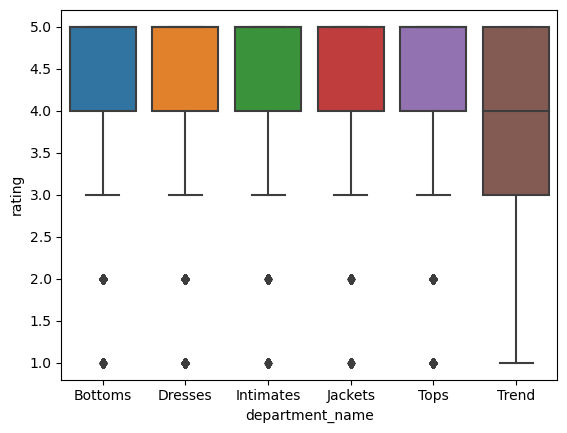

In [21]:
sns.boxplot(x=df['department_name'], y=df['rating'] )

In [22]:
n_by_dept = df.groupby(["department_name", "recommended_ind"])["clothing_id"].count()
print(n_by_dept)

#[] to specify the columns on which you want to perform the aggregation.

department_name  recommended_ind
Bottoms          False               551
                 True               3111
Dresses          False              1197
                 True               4948
Intimates        False               254
                 True               1399
Jackets          False               167
                 True                835
Tops             False              1902
                 True               8146
Trend            False                30
                 True                 88
Name: clothing_id, dtype: int64


In [23]:
#checking on outliers. Age goes from 18 to 99, which is ok. Ratings from 1 to 5. 
df.describe()

,clothing_id,age,rating,positive_feedback_count
count,22641.000000,22641.000000,22641.000000,22641.000000
mean,919.332362,43.280376,4.183561,2.630582
std,202.266874,12.326980,1.115762,5.786164
min,1.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,3.000000
max,1205.000000,99.000000,5.000000,122.000000


In [24]:
average_ratings = df.groupby('clothing_id')['rating'].mean().reset_index()
print(average_ratings)

      clothing_id    rating
0               1  4.000000
1               2  4.000000
2               3  5.000000
3               4  5.000000
4               5  5.000000
...           ...       ...
1174         1200  3.000000
1175         1202  4.333333
1176         1203  4.428571
1177         1204  4.500000
1178         1205  5.000000

[1179 rows x 2 columns]


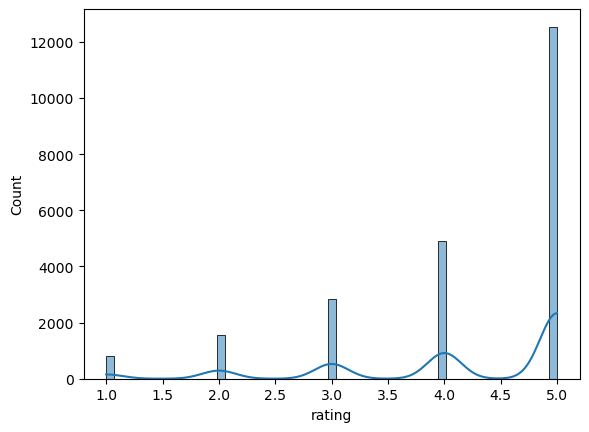

In [25]:
sns.histplot(df['rating'], kde=True)
plt.show()

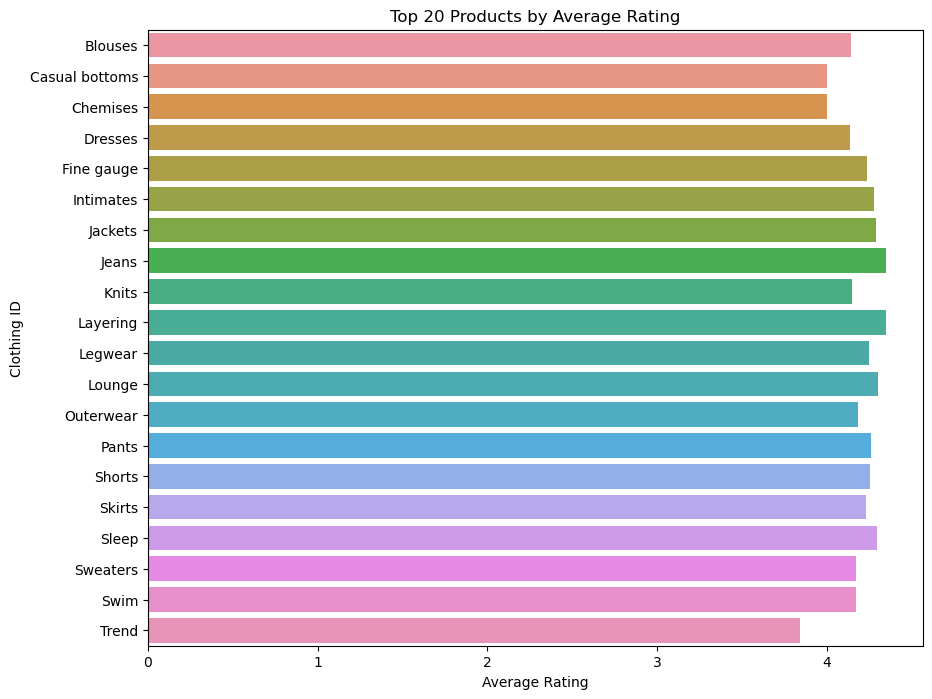

In [26]:
# Calculate average ratings for each product
avg_ratings = df.groupby('class_name')['rating'].mean()

# Sort products by average rating and take the top N
top_n = avg_ratings.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(y=top_n.index, x=top_n.values, orient='h')
plt.xlabel('Average Rating')
plt.ylabel('Clothing ID')
plt.title('Top 20 Products by Average Rating')
plt.show()

## Case Study 1: 10 products with the lowest avg ratings

### First thing to do is to group the ratings per product in order to get the mean of each of them, as well as counting the amount of ratings and counting the ones with rating = 1. In this first code I'll not filter the results, it's useful to have the whole data in case of doing any other similar enqueries.

In [27]:
ratings_per_product = df.groupby('clothing_id').agg(
    avg_rating=('rating', 'mean'),
    count_ratings=('rating', 'size'),
    count_ones=('rating', lambda x: (x == 1).sum())  # Count reviews with rating of 1
)
#print(ratings_per_product)

### With the total data grouped by the amount of ratings, the following codee filters by cases of more than one rating =1 and filters the 10 lowest average ratings. 
Using df.nsmallest(), a function that returns the first N occurrences ordered by a particular column in ascending order.

In [28]:
filter_higher_one = ratings_per_product[ratings_per_product['count_ones'] > 1]
N = 10  
filter_lowest_avg = filter_higher_one.nsmallest(N, 'avg_rating')

#display(filter_lowest_avg)

In [29]:
pd.set_option('display.max_colwidth', -1)

/tmp/ipykernel_20/3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### Created a subdataframe with the results and merging it to other extra useful info.


In [30]:
# Filter the DataFrame based on clothing_id
filtered_df = df[df['clothing_id'].isin(filter_lowest_avg.index)]

# Group by clothing_id and focus on the rating column
grouped_ratings = filtered_df.groupby('clothing_id')['rating']

# Find the index of the minimum rating for each group
idx = grouped_ratings.idxmin()

lowest_rated_reviews = df.loc[idx]

# Merge the products' ratings stats with their lowest-rated reviews
merged_data = pd.merge(filter_lowest_avg, lowest_rated_reviews[['clothing_id', 'review_text', 'rating']], 
                  left_index=True, right_on='clothing_id', how='left')

display(merged_data)

,avg_rating,count_ratings,count_ones,clothing_id,review_text,rating
6423,1.000000,2,2,973,"Even at a very deep discount, this piece is definitely not worth the money. the picture made me think this jacket had a longer curved velvet hem as part of its design (which would be cool)--which is largely what attracted me to it, but as i discovered when it arrived, that was actually part of the shirt worn beneath in the photo. so this image is rather misleading. the actual jacket is very thin--more like a shirt with an open front than a jacket. the pockets are just loosely tacked inside. for",1
12300,1.800000,5,2,569,"I was so excited about this top, and so disappointed when it arrived today. the lace part is lovely, but the skirt part is a crinoline type fabric that balloons out at the sides. it is gathered at the sides rather than pleated, and there is no way to get it to lay flat. the back center section is pleated. why couldn't they have had the pleats all around? this will be going back with much regret.",1
9889,2.000000,4,2,588,"The picture makes the shorts look structured. i assumed they were made of a heavier cotton material. i was disappointed when they turned out to be a light weight polyester. \r\n\r\nalso, this runs way too big. i am busty and did not fill out the top of the xs.\r\n\r\ni wouldn't even buy this at the sale price.",1
17052,2.181818,11,4,229,"Ordered on line and thought these are a great quality as i pulled them out of the box. tried them on and found minimal elastic for the waist. within minutes of wearing, the waist fell down past my hips...glad i was at home. looks cute but will not stay up.",1
10364,2.888889,9,2,1039,"These are terribly unflattering the wash looks dirty and the rise is not 10.5 like the description says, which is the only reason i gambled on these it is 13"".",1
3528,3.105263,19,2,929,I was interested in this sweater because i actually thought it was a tunic. the sweater is much shorter than i thought. i wish i could return it. i bought a size large which is my normal size.,1
4458,3.222222,9,2,1145,I am not sure who would look good in this dress. it is extremely oversized with tons of fabric that will not flatter anyone!,1
3966,3.291667,24,4,1055,"I ordered these because of the side zipper, but they zip in front, even though the order listing and bag label called them ""wine, side zip pants."" they were also at least two sizes larger than marked and very flimsy material. what bothers me is that i was charged $5.95 to send them back, even though the product description (and the name before someone changed it on the website) were wrong.",1
1946,3.333333,24,3,1016,Cute skirt but i agree with the other reviewer. you can't get it on! i tried my skinny daughter tried no go!,1
9041,3.400000,5,2,971,"This blazer looks great on the model and i have a long torso so i thought it would be perfect. when i got it it looked like a big box and didn't fit anywhere. the shoulder pads were giant and the bottom of the coat was huge. i got a small based on other reviews, but it was way too big. sadly, i had to return it.",1


validation: Before using .loc[], you can check if the indices in idx are present in df using set(idx).issubset(df.index). This will return True if all indices in idx are in df.

In [31]:
print(df.index)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            23475, 23476, 23477, 23478, 23479, 23481, 23482, 23483, 23484,
            23485],
           dtype='int64', length=22641)


In [32]:
#validation that the index of idx has everything of the df index
set(idx).issubset(df.index)

True

## Case Study 2: 

In [33]:
# Group the DataFrame by 'product' and calculate the count of ratings for each group
ratings_per_product = df.groupby('clothing_id')['rating'].count().reset_index()
# Rename the 'rating' column to 'rating_count' for clarity
ratings_per_product.rename(columns={'rating': 'rating_count'}, inplace=True)

ratings_per_product = ratings_per_product[ratings_per_product ['rating_count'] > 300]

#display(ratings_per_product)

more_300 = df.loc[ratings_per_product['clothing_id']] 

# Merge the products' ratings stats with their lowest-rated reviews
merged_data = pd.merge(ratings_per_product, more_300[['clothing_id', 'review_text', 'rating']], 
                  left_index=True, right_on='clothing_id', how='left')

display(merged_data)

,clothing_id,clothing_id_x,rating_count,clothing_id_y,review_text,rating
NaN,806,829,512,NaN,NaN,NaN
NaN,827,850,324,NaN,NaN,NaN
NaN,838,862,778,NaN,NaN,NaN
NaN,843,867,333,NaN,NaN,NaN
NaN,844,868,414,NaN,NaN,NaN
NaN,848,872,519,NaN,NaN,NaN
NaN,871,895,384,NaN,NaN,NaN
NaN,912,936,348,NaN,NaN,NaN
NaN,1053,1078,987,NaN,NaN,NaN
NaN,1056,1081,561,NaN,NaN,NaN


In [34]:
#how about looking for the outliers of the sum of ratings.

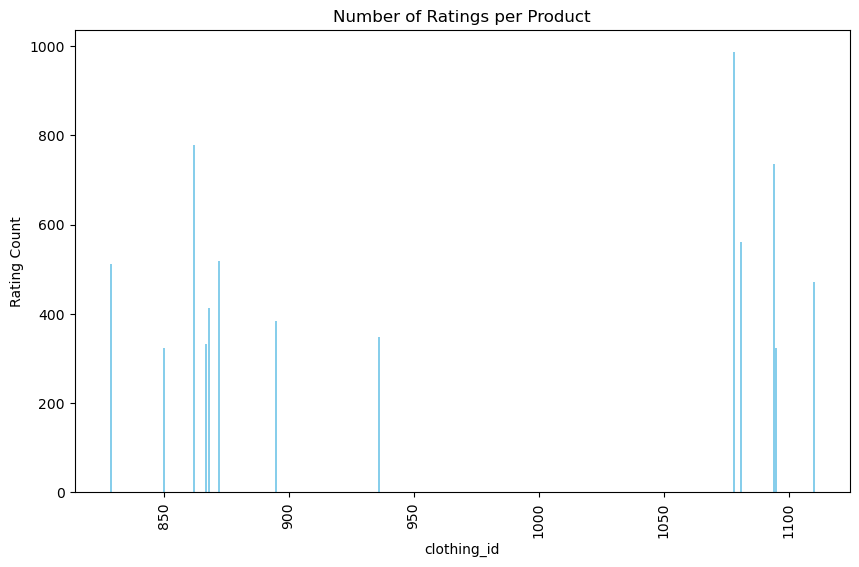

In [35]:
# Rename the 'rating' column to 'rating_count' for clarity
ratings_per_product.rename(columns={'rating': 'rating_count'}, inplace=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(ratings_per_product['clothing_id'], ratings_per_product['rating_count'], color='skyblue')
plt.xlabel('clothing_id')
plt.ylabel('Rating Count')
plt.title('Number of Ratings per Product')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [36]:
# ser = next(iter(df.groupby("outlet", sort=False)["title"]))
#ser.str.contains("Fed")

#for future analysis, looking up dor strings, ex. positive reeviews have mostly this string, neg has thiss one.

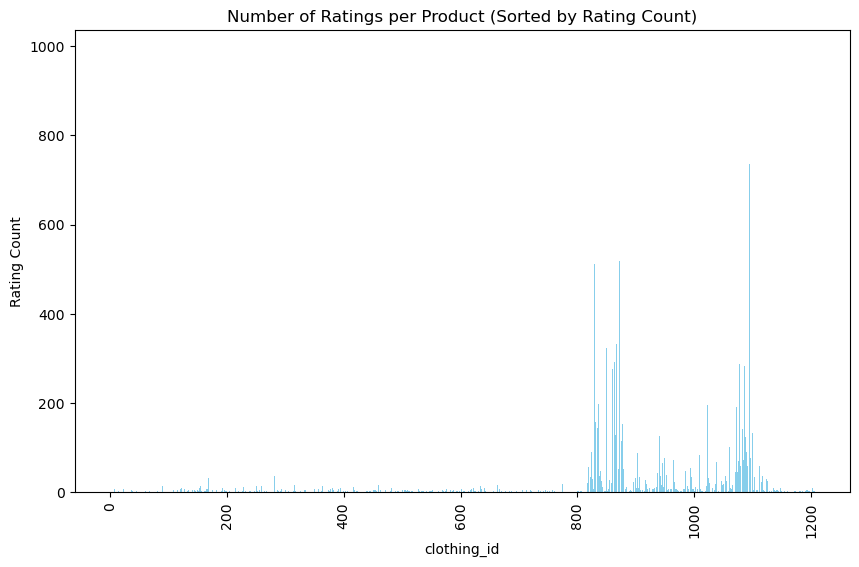

In [37]:
# Group the DataFrame by 'clothing_id' and calculate the count of ratings for each group
ratings_per_product = df.groupby('clothing_id')['rating'].count().reset_index()

# Rename the 'rating' column to 'rating_count' for clarity
ratings_per_product.rename(columns={'rating': 'rating_count'}, inplace=True)

# Sort products by rating count in descending order
ratings_per_product = ratings_per_product.sort_values(by='rating_count', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(ratings_per_product['clothing_id'], ratings_per_product['rating_count'], color='skyblue')
plt.xlabel('clothing_id')
plt.ylabel('Rating Count')
plt.title('Number of Ratings per Product (Sorted by Rating Count)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

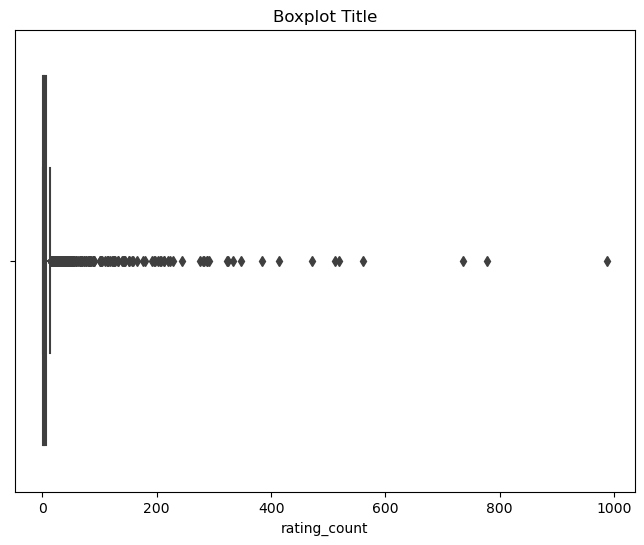

In [38]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.boxplot(x='rating_count', data=ratings_per_product)  # Replace 'x_data' and 'y_data' with your data columns and 'df' with your DataFrame
plt.title('Boxplot Title')  # Optional: Set the plot title
plt.xlabel('rating_count')  # Optional: Set the X-axis label
#plt.ylabel('clothing_id')  # Optional: Set the Y-axis label
plt.show()

# 4. Sentiment analysis <a class="anchor"  id="section4"></a>

## As mentioned in the introduction, during this project Textblob and VADER will be utilized. First, I'm running a simple test to know how they work.

In [39]:
# Loading Vader 
analyzer = SentimentIntensityAnalyzer()

# Text to analyze
text = "This is a good example of VADER sentiment analysis"

# Analyze sentiment using VADER
vader_sentiment_scores = analyzer.polarity_scores(text)

# Access sentiment scores
print("Positive:", vader_sentiment_scores['pos'])
print("Negative:", vader_sentiment_scores['neg'])
print("Neutral:", vader_sentiment_scores['neu'])
print("Compound:", vader_sentiment_scores['compound'])

Positive: 0.266
Negative: 0.0
Neutral: 0.734
Compound: 0.4404


In [40]:
# Text to analyze
text_blob = TextBlob("This is a good example of a TextBlob")
sentiment_blob = text_blob.sentiment

# Access TextBlob sentiment scores
polarity_blob = sentiment_blob.polarity
subjectivity_blob = sentiment_blob.subjectivity

print("TextBlob Polarity:", polarity_blob)
print("TextBlob Subjectivity:", subjectivity_blob)

TextBlob Polarity: 0.7
TextBlob Subjectivity: 0.6000000000000001


### In these examples, we have two different sentiment analysis tools providing sentiment scores for two similar statements. 

#### Here's a brief comparison:

#### **TextBlob:** It provides polarity and subjectivity scores. In Example 1, the polarity score is 0.7, indicating a positive sentiment, and the subjectivity score is 0.6, indicating a moderate level of subjectivity.

#### **VADER:** It provides positive, negative, neutral, and compound scores. In Example 2, the compound score is 0.6369, which suggests a positive sentiment. The positive score (0.458) is the highest, indicating a positive sentiment.

#### Both tools generally agree on the sentiment of the given statements, classifying them as positive. However, the exact numeric scores may differ because each tool employs its own sentiment analysis algorithms and scoring systems. Additionally, TextBlob provides a subjectivity score, which VADER does not include in its output.


# adding textblob and vader to the dataframe

In [41]:
#load the descriptions into textblob
desc_blob = [TextBlob(desc) for desc in df['review_text']]

In [42]:
#add the TEXTBLOB sentiment metrics to the dataframe
df['tb_pol'] = [b.sentiment.polarity for b in desc_blob]
df['tb_subj'] = [b.sentiment.subjectivity for b in desc_blob]

#Add VADER metrics to dataframe
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df['review_text']]
df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df['review_text']]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df['review_text']]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df['review_text']]

### *About the previous code*

This code added an extra column with the sentiment analysis, which includes polarity and subjectivity. 
**.sentiment** returns a namedtuple of the form Sentiment(polarity, subjectivity).

The code is used to calculate sentiment metrics for text data in a DataFrame using both TextBlob and VADER sentiment analysis tools. The `sentiment_calc` function is used with TextBlob to calculate sentiment polarity and subjectivity, while VADER is used to calculate compound, negative, neutral, and positive scores. Here's a breakdown of the code:

1. `sentiment_calc` Function:
   - This function uses TextBlob to calculate sentiment polarity and subjectivity for a given text.
   - If TextBlob encounters an error (e.g., if the text is empty or not in a valid format), it returns `None`.

2. `df['sentiment']`:
   - This line applies the `sentiment_calc` function to the 'review_text' column in your DataFrame and creates a new 'sentiment' column with the calculated sentiment values.

3. `df['tb_Pol']` and `df['tb_Subj']`:
   - These lines calculate the sentiment polarity and subjectivity using TextBlob for each text in the DataFrame and store the results in separate columns.

4. VADER Sentiment Analysis:
   - You then load the VADER sentiment analysis tool using the `SentimentIntensityAnalyzer` class from the `nltk` library.

5. `df['compound']`, `df['neg']`, `df['neu']`, `df['pos']`:
   - These lines calculate VADER sentiment metrics (compound, negative, neutral, and positive scores) for each text in the 'review_text' column and store the results in separate columns.

The code appears to be correctly set up to calculate and store sentiment metrics using both TextBlob and VADER. The `sentiment` column will contain the sentiment values calculated by TextBlob, and the additional columns will contain sentiment metrics calculated by VADER. The `sentiment_calc` function ensures that even if TextBlob encounters an error for some texts, it won't break the entire process.


In [43]:
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name', 'classification', 'tb_pol', 'tb_subj',
       'compound', 'neg', 'neu', 'pos'],
      dtype='object')

## displaying just the useful columns to understand behavior

In [44]:
selected_columns = ['clothing_id', 'review_text', 'rating', 'recommended_ind', 'positive_feedback_count', 'tb_pol',
                    'tb_subj', 'compound', 'neg', 'neu', 'pos']

df[selected_columns].head(10).style.hide_index() \
                    .format({"tb_pol": "{:.2f}",
                             'tb_subj': "{:.2f}",
                            "compound": "{:.2f}",
                            "neg": "{:.2f}",
                            "neu": "{:.2f}",
                            "pos": "{:.2f}"}) \
                    .highlight_max(color='green') \
                    .highlight_min(color='#cd4f39')

/tmp/ipykernel_20/2544875101.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df[selected_columns].head(10).style.hide_index() \


clothing_id,review_text,rating,recommended_ind,positive_feedback_count,tb_pol,tb_subj,compound,neg,neu,pos
767,Absolutely wonderful - silky and sexy and comfortable,4,True,0,0.63,0.93,0.89,0.00,0.32,0.68
1080,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,True,4,0.34,0.73,0.97,0.00,0.70,0.30
1077,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,False,0,0.07,0.36,0.92,0.03,0.83,0.14
1049,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,True,0,0.55,0.62,0.57,0.21,0.40,0.40
847,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,True,6,0.51,0.57,0.93,0.00,0.70,0.30
1080,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,False,4,0.18,0.53,0.94,0.00,0.86,0.14
858,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,True,1,0.13,0.61,0.68,0.04,0.87,0.09
858,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,True,4,0.17,0.50,-0.09,0.04,0.91,0.05
1077,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,True,0,0.00,0.38,0.72,0.00,0.84,0.16
1077,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",5,True,0,0.20,0.47,0.87,0.05,0.77,0.18


tiene que haber una correlación entre un puntaje 4 o más, polarity score higher than 0.7 and a pos 0.6 or higher.

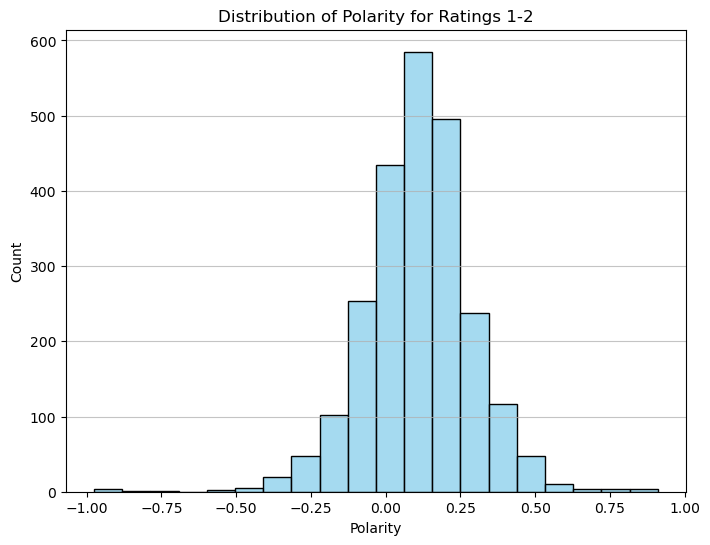

In [45]:
# Filter the DataFrame for rows where 'rating' is between 1 and 2
filtered_df = df[(df['rating'] >= 1) & (df['rating'] <= 2)]

# Create a histogram to visualize the distribution of 'polarity'
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_df, x='tb_pol', bins=20, color='skyblue')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Distribution of Polarity for Ratings 1-2')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

In [46]:
# Define a function to apply the conditions and return a boolean value
def is_high_rating_polarity_pos(row):
    return (row['rating'] >= 1 and row['rating'] <= 5) and (row['tb_pol'] > 0.7) and (row['pos'] > 0.6)

# Apply the function to each row and create a new column 'is_high_rating_polarity_pos'
df['is_high_rating_polarity_pos'] = df.apply(is_high_rating_polarity_pos, axis=1)

# Filter the rows where the conditions are met
filtered_df = df[df['is_high_rating_polarity_pos']]

# Display the resulting DataFrame
print(filtered_df)

       clothing_id  age                             title  \
541    984          46   NaN                                
859    886          27   NaN                                
1637   992          53   Stunning skirt!                    
3987   860          37   NaN                                
4014   1078         62   Patch work dress                   
4232   1086         59   NaN                                
4372   1078         39   Gorgeous dress                     
5532   861          41   Pretty top                         
6035   873          46   Cute top                           
6511   1020         31   Great skirt                        
6543   1095         94   NaN                                
6588   828          42   Besutiful                          
6914   850          53   Just perfect                       
7283   862          60   NaN                                
8099   1078         57   Awesome prettie in pink            
8717   943          57  

## 4. Visualization <a class="anchor"  id="section5"></a>

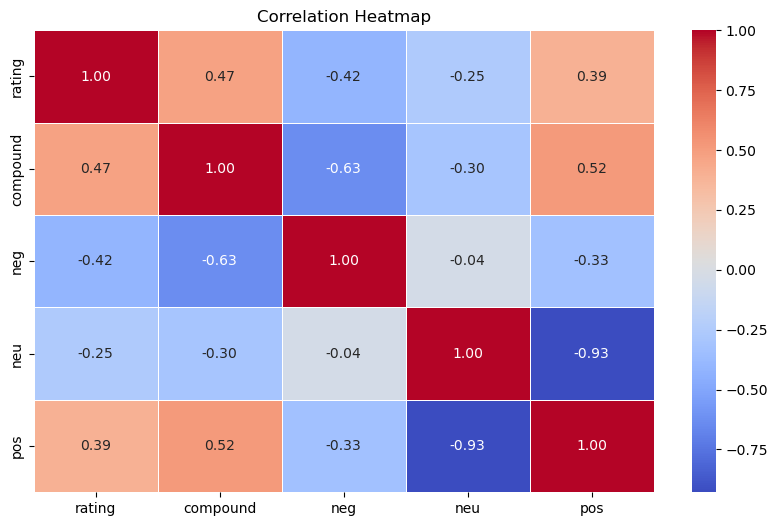

In [47]:
# Assuming you have a DataFrame 'df' with columns 'rating', 'compound', 'neg', 'neu', and 'pos'
# Calculate the correlation matrix
correlation_matrix = df[['rating', 'compound', 'neg', 'neu', 'pos']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

#### understanding relationship between the calculated fields
correlación entre rating y pos no es tanta como me imaginaba, 

if the distribution concetrates most of the reviews in 5 stars / pos

## Analyzing positive reviews

In [48]:
# Filter the DataFrame where 0.65 > df['pos'] is FALSE
df_pos_reviews = df[df['pos'] >= 0.65]

#print(df_pos_reviews[['review_text', 'rating', 'neg', 'pos', 'neu']])

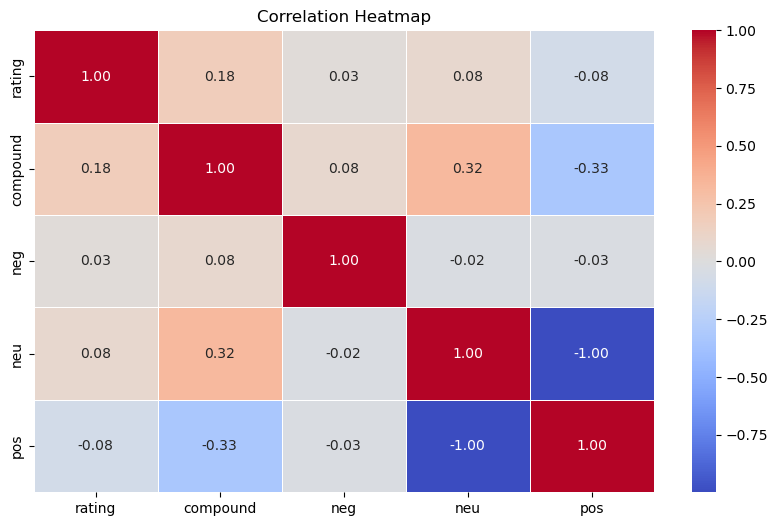

In [49]:
# Assuming you have a DataFrame 'df' with columns 'rating', 'compound', 'neg', 'neu', and 'pos'
# Calculate the correlation matrix
correlation_matrix = df_pos_reviews[['rating', 'compound', 'neg', 'neu', 'pos']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [50]:
# Calculate the correlation matrix
correlation_matrix = df[['rating', 'compound', 'neg', 'neu', 'pos']].corr()

rating_vs_compound_corr = correlation_matrix.loc['rating', 'compound']
print(f"Correlation between 'rating' and 'neu': {rating_vs_compound_corr}")

Correlation between 'rating' and 'neu': 0.47345884392621684


In [51]:
# Calculate counts for 'neg', 'pos', and 'neu' values
counts = df[['neg', 'pos', 'neu']].apply(lambda col: col.value_counts().sum())

**Categorizing customer's reviews into Positive and Negative sentiments and plotting it.**

## 5. WordCloud for Description column <a class="anchor"  id="section6"></a>

Counting frequency of words of customer's reviews.

# Conclusion <a class="anchor"  id="section7"></a>

Posibles aplicacionees: comparación entre liberarias y ver cuál es más acertada https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

Sources: 
https://medium.com/swlh/simple-sentiment-analysis-for-nlp-beginners-and-everyone-else-using-vader-and-textblob-728da3dbe33d

https://medium.com/mlearning-ai/nlp-day-5-feelings-are-important-a-basic-sentiment-analysis-c09cb01a6bf8

https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

https://medium.com/analytics-vidhya/sentiment-analysis-using-textblob-ecaaf0373dff


https://analyticsindiamag.com/how-to-obtain-a-sentiment-score-for-a-sentence-using-textblob/


Thanks. Any suggestions are welcomed :)